In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [2]:
#Code for creating data frame of testing data
data = pd.read_csv('requests.csv')
data.columns = ['timestamp', 'userID', 'sessionID', 'expiring', 'URL']
print(data)

            timestamp      userID                              sessionID  \
0       1676373343936   user-1003   c85cbd00-d2fc-4cda-9f5c-66616847d851   
1       1676373344344   user-1005   a0038f81-b46a-4f26-a7ea-2791d53404fb   
2       1676373344456   user-1003   c85cbd00-d2fc-4cda-9f5c-66616847d851   
3       1676373344912     user-65   fd48a9f9-67f4-4185-9bcc-a76b7139401c   
4       1676373345020   user-1005   a0038f81-b46a-4f26-a7ea-2791d53404fb   
...               ...         ...                                    ...   
263206  1676444990852    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263207  1676444991104    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263208  1676444991342    user-629   2a43fe7f-d300-470d-9523-d362b70b37d3   
263209  1676444991375   user-1005   0e84ab80-bfa4-402b-9ae0-6397441e91d6   
263210  1676444992110   user-1005   0e84ab80-bfa4-402b-9ae0-6397441e91d6   

             expiring                            URL  
0       1676373495816           

In [12]:
users = list(data['userID'])
allUsers = data.set_index(['userID']).rename_axis(None)
allUsers = allUsers.drop(columns=['timestamp', 'sessionID', 'expiring'])
df = allUsers.groupby(level=0).agg(','.join)
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'users'})
df

,users,URL
0,user-10,"/login, /searchUsers?page=0, /profile/372, /c..."
1,user-100,"/login, /searchUsers?page=0, /profile/716, /p..."
2,user-1000,"/login, /searchUsers?page=0, /profile/626, /c..."
3,user-1001,"/login, /searchUsers?page=0, /profile/117, /p..."
4,user-1002,"/login, /searchUsers?page=0, /profile/162, /c..."
...,...,...
999,user-995,"/login, /searchUsers?page=0, /profile/337, /p..."
1000,user-996,"/login, /searchUsers?page=0, /profile/642, /p..."
1001,user-997,"/login, /searchUsers?page=0, /profile/760, /c..."
1002,user-998,"/login, /searchUsers?page=0, /profile/944, /p..."


In [ ]:
request_logs = df['URL']

cleaned_logs = []

for i in range(0, len(request_logs)):
    sequence = re.sub('[^a-zA-Z]', ' ', request_logs[i])
    sequence = sequence.lower()
    cleaned_logs.append(sequence)

# 5 and 6: spammers, 7: data scraper
print(cleaned_logs[7])

In [14]:
df['request_logs'] = cleaned_logs
df = df.drop('URL', axis=1)
df

,users,request_logs
0,user-10,login searchusers page profile c...
1,user-100,login searchusers page profile p...
2,user-1000,login searchusers page profile c...
3,user-1001,login searchusers page profile p...
4,user-1002,login searchusers page profile c...
...,...,...
999,user-995,login searchusers page profile p...
1000,user-996,login searchusers page profile p...
1001,user-997,login searchusers page profile c...
1002,user-998,login searchusers page profile p...


In [15]:
#Using the tfidf-vectorizer
tfidf_vect = TfidfVectorizer()
vect_logs = tfidf_vect.fit_transform(df['request_logs'])

print(vect_logs.todense())


[[0.04185434 0.28270935 0.02389254 ... 0.26359964 0.28270935 0.02389254]
 [0.         0.25720906 0.         ... 0.17789072 0.25720906 0.        ]
 [0.0773957  0.26138851 0.04418132 ... 0.19149427 0.26138851 0.04418132]
 ...
 [0.02328439 0.16776186 0.02658378 ... 0.20949376 0.16776186 0.02658378]
 [0.         0.25652834 0.         ... 0.17084881 0.25652834 0.        ]
 [0.09897283 0.356545   0.         ... 0.1780952  0.356545   0.        ]]


In [16]:
vect_logs.shape[1]

15

In [17]:
arr_values = []
#arr_variance = []

for i in range(0,1):
    for j in range (0, vect_logs.shape[1]):
        #print(vect_logs[i,j])
        val = vect_logs[i,j]
        arr_values.append(val)
        
print(arr_values, '\n')

array = np.array(arr_values)
print(array, '\n')
print(np.var([arr_values]))

[0.04185434270712021, 0.282709348188244, 0.023892541171969546, 0.5665450304893237, 0.08196963306760952, 0.0, 0.13179981976611044, 0.28327251524466185, 0.3389138222557126, 0.0, 0.4716513189096292, 0.0717512204475485, 0.2635996395322209, 0.282709348188244, 0.023892541171969546] 

[0.04185434 0.28270935 0.02389254 0.56654503 0.08196963 0.
 0.13179982 0.28327252 0.33891382 0.         0.47165132 0.07175122
 0.26359964 0.28270935 0.02389254] 

0.030196842592226925


In [18]:
#Just some code to see what we got :)
vector_tfidfvectorizer=vect_logs[7] 
df2 = pd.DataFrame(vector_tfidfvectorizer.T.todense(), index=tfidf_vect.get_feature_names_out(), columns=["tfidf"])
df2.sort_values(by=["tfidf"], ascending=False)

#variance normal user[0]: 0.030732589
#variance normal user[1]: 0.040072223
#variance spammer 1: 0.075907392
#variance spammer 2: 0.075314139
#variance data scraper: 0.25440979

,tfidf
profile,0.987046
page,0.113416
searchusers,0.113416
login,0.003803
block,0.000000
chat,0.000000
config,0.000000
conversation,0.000000
inbox,0.000000
like,0.000000


In [24]:
df_tfidf_scores = pd.DataFrame(vect_logs.todense(), columns= tfidf_vect.get_feature_names_out())
users = df['users']
#df_complete = pd.concat([df, df_tfidf_scores], axis=1)
#df_complete = df_complete.drop('request_logs', axis=1)
#df_complete

#Tror att vi vill hålla dem separat så att vi bara har numeriska värden att köra in i modellen. Men nu finns det en korrekt indexerad lista på alla användare:)
print(users)
print(df_tfidf_scores)

0          user-10
1         user-100
2        user-1000
3        user-1001
4        user-1002
           ...    
999       user-995
1000      user-996
1001      user-997
1002      user-998
1003      user-999
Name: users, Length: 1004, dtype: object
         block      chat    config  conversation     inbox      like  \
0     0.041854  0.282709  0.023893      0.566545  0.081970  0.000000   
1     0.000000  0.257209  0.000000      0.674041  0.043025  0.023595   
2     0.077396  0.261389  0.044181      0.593661  0.170523  0.041562   
3     0.000000  0.293644  0.046531      0.551679  0.019955  0.021886   
4     0.022696  0.183961  0.000000      0.655386  0.022224  0.024376   
...        ...       ...       ...           ...       ...       ...   
999   0.022091  0.268593  0.075665      0.518321  0.032449  0.071180   
1000  0.046054  0.308113  0.030046      0.593706  0.051540  0.028264   
1001  0.023284  0.167762  0.026584      0.672384  0.068402  0.050016   
1002  0.000000  0.256528  0.00

In [138]:
model = IsolationForest(contamination=0.001, random_state=42)
model.fit(df_tfidf_scores)

c:\Users\rosin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, random_state=42)

In [ ]:
model.fit(df_tfidf_scores)

In [139]:
df_tfidf_scores['anomaly_scores'] = model.decision_function(df_tfidf_scores)

In [140]:
df_tfidf_scores['anomaly'] = model.predict(df_tfidf_scores)

c:\Users\rosin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- anomaly_scores

  warnings.warn(message, FutureWarning)


ValueError: X has 16 features, but IsolationForest is expecting 15 features as input.

In [ ]:
#Visualizing data with t-SNE
embedded_data = TSNE(perplexity=50.0, n_iter=2000).fit_transform(np.asarray(vect_logs.todense()))
spammer1 = embedded_data[5]
spammer2 = embedded_data[6]
dataScraper = embedded_data[7]

c:\Users\rosin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\rosin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


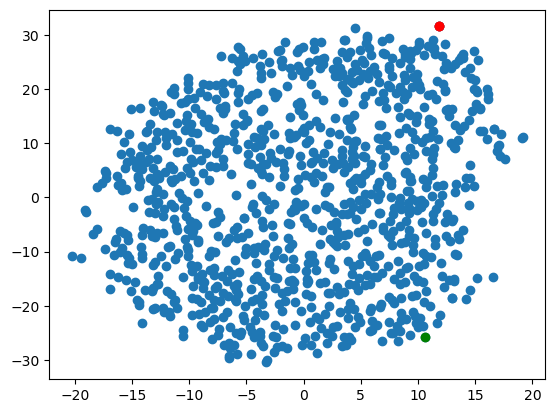

In [ ]:
plt.scatter(embedded_data[:,0], embedded_data[:,1])
plt.scatter(spammer1[0],spammer1[1], color='red')
plt.scatter(spammer2[0],spammer2[1], color='red')
plt.scatter(dataScraper[0],dataScraper[1], color='green')

In [ ]:
X = np.asarray(vect_logs.todense())
pca = PCA()
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc)
print(pc.shape)
pc

(1004, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.014151,-0.056579,0.032928,-0.023269,0.055481,-0.034205,-0.040538,0.025775,-0.016518,0.009518,-1.280286e-16,-3.831713e-17,1.057929e-17,-2.338633e-18,-4.856402e-18
1,-0.004119,0.024946,-0.147911,-0.022661,0.028510,0.034089,-0.014530,0.004799,0.003663,-0.007788,-8.744214e-17,7.338508e-16,1.255754e-18,1.164123e-18,-1.868838e-18
2,-0.014892,-0.116458,-0.007735,0.021352,-0.046803,-0.034033,0.011968,0.011323,-0.003120,0.009117,-1.191586e-16,4.896034e-19,2.597761e-16,-8.735034e-18,5.820718e-19
3,0.053916,0.163665,-0.006286,0.058890,-0.023201,-0.003443,-0.069031,0.003830,0.044711,0.003305,-6.055011e-17,2.214700e-18,1.491026e-17,9.567101e-17,4.410390e-17
4,-0.117871,0.056486,-0.085556,-0.028776,0.044079,0.009919,-0.032389,0.033688,0.008695,0.033079,2.456695e-16,-6.957825e-18,1.102752e-18,4.682014e-18,-3.520608e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,-0.003835,0.099379,0.097485,0.005731,-0.050682,0.024302,-0.019628,0.004157,-0.008210,-0.023072,-1.329339e-16,4.575345e-19,-3.629689e-18,-1.301168e-18,3.277074e-19
1000,0.065047,0.050680,-0.043768,0.016372,-0.001074,-0.001450,0.013162,0.007790,-0.017865,-0.020936,-1.153172e-16,-8.995457e-19,-4.964431e-20,1.634690e-19,-6.660678e-19
1001,-0.146306,-0.000804,-0.094498,-0.031923,-0.004844,0.033087,0.017118,-0.003498,0.002426,-0.018177,-9.874414e-17,1.573456e-18,4.964509e-19,1.209640e-18,-1.029603e-18
1002,-0.020214,-0.117290,-0.037662,0.069434,-0.017167,0.054558,0.004377,-0.023142,-0.014244,0.004660,-1.185357e-16,-5.354122e-19,-5.627769e-20,-2.431543e-18,2.037926e-18


In [ ]:
print("Eigen values: ", list(np.round(pca.explained_variance_, decimals=5)))
print("PCA_variance_ratio: ", pca.explained_variance_ratio_)
print(pca.n_components)

Eigen values:  [0.01488, 0.00659, 0.0065, 0.0027, 0.00165, 0.00096, 0.00072, 0.00067, 0.00064, 0.00044, 0.0, 0.0, 0.0, 0.0, 0.0]
PCA_variance_ratio:  [4.16085399e-01 1.84349822e-01 1.81923581e-01 7.55255767e-02
 4.62256577e-02 2.67749579e-02 2.01896368e-02 1.87541698e-02
 1.79152153e-02 1.22559840e-02 3.65468573e-31 1.53534692e-32
 1.92533169e-33 4.23884406e-34 1.60565512e-34]
None


Following code just serves as a way to experiment using sequence of numbers. Could we use tfidf for vectorizing data?

In [ ]:
#Function to create a sequence of numbers. Approx. 10% of the sequences will consist of duplicates of the same number
import random

def create_sequence(arr, randVal):
    if (randVal < 1):
        val = random.randint(1,9)
        for i in range (50):
            arr.append(val)
    else:    
        for i in range (0, 50):
            arr.append(random.randint(1,9))
    return arr    

In [ ]:
#Function to give a sequence a score depending on number of consecutive duplicates
def sequence_evaluation(df):
    arr = []
    for i in range (0, df.shape[0]):
        data = df.iloc[i].to_list()
        score = 0
        lr = 0.1
        val = data[0]
        for j in range (1, len(data)):
            if (data[j] == val):
                score -= lr*data[j]
                if(lr < 1):
                    lr += 1.1*lr
            else:
                score += data[j]
                val = data[j]
        arr.append(score) 
    return arr     

In [ ]:
#Function that calculates length of the longest subsequence of consecutive duplicates for each sequence
from itertools import groupby

def longestConsecutive(df):
    arr = []
    for i in range (0, df.shape[0]):
        longest_streak = len(max([list(group) for _, group in groupby(df.iloc[i].to_list())], key=len))
        arr.append(longest_streak)
    return arr

In [ ]:
#Creation of the sequence data frame
sequence_matrix = []
for i in range (1000):
    randVal = random.randint(0,9)
    arr = []
    sequence_matrix.append(create_sequence(arr, randVal))

sequence_df = pd.DataFrame(sequence_matrix)

sequence_df['score'] = sequence_evaluation(sequence_df)
sequence_df['longestConsec'] = longestConsecutive(sequence_df.loc[:, sequence_df.columns != 'score'])
sequence_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,score,longestConsec
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,-178.38710,50
1,7,2,1,4,2,3,2,5,4,6,...,2,2,5,1,9,8,9,5,123.78208,3
2,8,5,8,4,2,4,5,3,6,4,...,3,2,2,7,3,3,6,2,114.16310,3
3,5,1,7,8,9,6,4,1,4,1,...,8,6,9,3,4,2,9,3,203.39200,3
4,4,9,9,4,7,8,7,2,7,1,...,8,9,7,4,5,3,3,2,201.97204,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,8,6,3,3,3,6,9,9,5,...,5,4,5,7,1,6,4,2,195.32270,3
996,6,4,2,7,7,9,6,6,5,4,...,8,3,9,5,5,7,5,6,174.57170,2
997,1,8,6,3,7,4,7,8,4,1,...,2,9,4,8,8,2,2,2,105.54615,6
998,3,2,7,1,7,6,1,8,2,8,...,1,7,5,9,1,8,4,7,206.38500,2


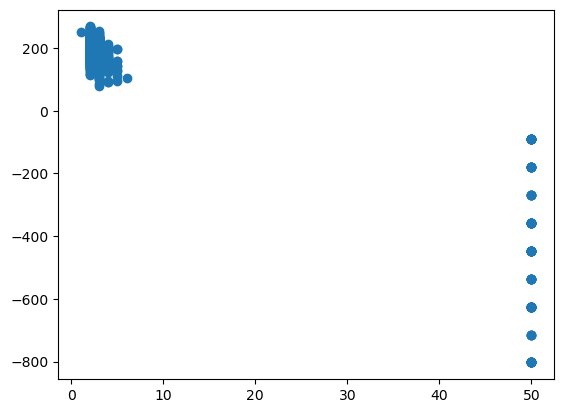

In [ ]:
#A yanky scatter plot....
plt.scatter(sequence_df['longestConsec'], sequence_df['score'])